In [1]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
# Read dataset file
df = pd.read_csv('BTC.csv')
df = df[['Price']]
df = df.dropna() # Drop missing values
df

,Price
0,8245.7
1,8245.1
2,8529.0
3,8403.3
4,8006.0
...,...
1822,26920.0
1823,27183.9
1824,27035.3
1825,27403.1


In [3]:
# Split the data into training, testing, and validation sets with 5:3:2
train_size = int(0.5 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [4]:
#Linear Regression model
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])
# Define the model
model = LinearRegression()
# Train the model
model.fit(x_train, y_train)

LinearRegression()

In [5]:
# make predictions on the testing set
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

# make predictions on the validate set
x_val = np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_vpred = model.predict(x_val)

In [6]:
# calculate the RMSE
valid_rmse = np.sqrt(np.mean((y_vpred - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# calculate the MAPE
valid_mape = np.mean(np.abs((y_val - y_vpred) / y_val)) * 100
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Validation MAPE:", valid_mape)
print("Testing MAPE:", test_mape)

# calculate the MAE
valid_mae = np.mean(np.abs(y_vpred - y_val))
test_mae = np.mean(np.abs(y_pred - y_test))
print("Validation MAE:", valid_mae)
print("Testing MAPE:", test_mape)

Validation RMSE: 7892.569887834531
Testing RMSE: 32634.152467752087
Validation MAPE: 27.716727777858395
Testing MAPE: 68.52983074985747
Validation MAE: 6724.064727072987
Testing MAPE: 68.52983074985747


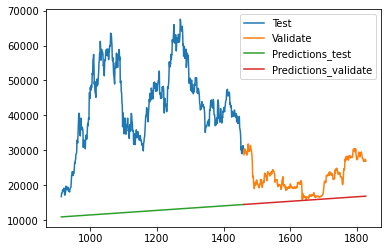

In [7]:
# ploting the actual values and predicted values
plt.plot(test_data.index, test_data['Price'])
plt.plot(val_data.index, val_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_vpred)
plt.legend(['Test','Validate', 'Predictions_test','Predictions_validate'])
plt.show()